# AI system for Crop recommendation dataset

## Explanation of what the dataset is and what features it has.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

# Reading input data
df = pd.read_csv('Crop_recommendation.csv', sep=',')
df.shape

(2200, 8)

In [2]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


This dataset has 2200 rows/instances and 8 columns/features.

In [3]:
# Exploring the dataset's features
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

After monitoring the columnsط name and reading about this dataset, the following is concluded:

**- Dataset goal:** to build a predictive model to recommend the most suitable crops to grow on a particular farm based on various parameters.

**- Dataset source:** statistically significant rainfall and climate data, as well as fertilizer data, were combined to build this dataset. ICFA (Indian Chamber of Food and Agriculture), India gathered this data over time.

**- Features' metadata:** 

**1-** *N* : ratio of Nitrogen content in soil.

**2-** *P* : ratio of Phosphorous content in soil.

**3-** *K* : ratio of Potassium content in soil.

**4-** *temperature* : temperature in degree Celsius.

**5-** *humidity* : relative humidity in %.

**6-** *ph* : ph value of the soil.

**7-** *rainfall* : rainfall in mm.

## Exploring the distribution of the different data features.

In [4]:
# Description of the data to mainly check the min, max, std and mean value for each feature in this dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


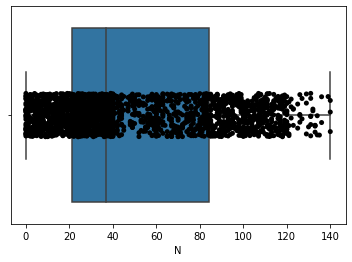

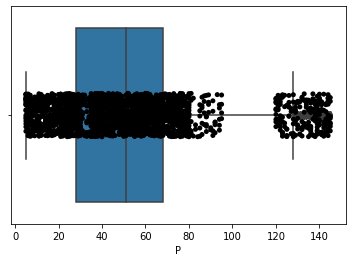

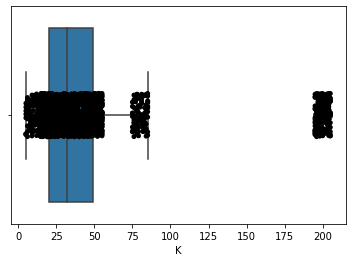

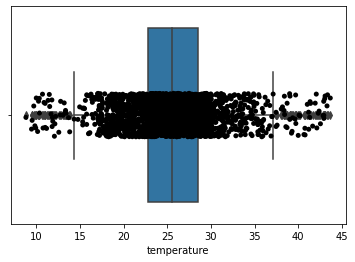

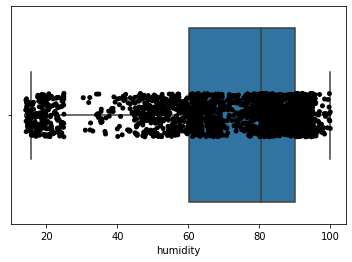

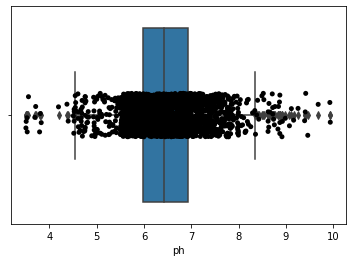

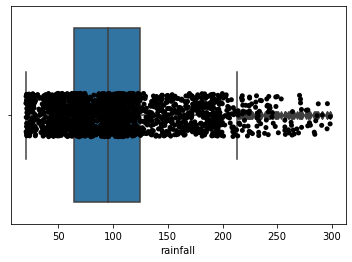

In [5]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in features:
    sns.boxplot(x = feature, data = df)
    sns.stripplot(x = feature, data = df, color = "black")
    plt.show()

After showing the above results to an agricultural expert, Eng. Ayman Al-Zweri, he ensured the normality and logicality of the ranges of the features. It can also be noticed that P and K features' data points make clusters, let's visualize them in depth.

In [6]:
# Mapping K values to categories (clusters)
criteria = [df['K'].between(0, 60), df['K'].between(60, 180), df['K'].between(180, 250)]
values = ['low', 'medium','high']

df['K_amount'] = np.select(criteria, values, 0)

df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,K_amount
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,low
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,low
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,low
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,low
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,low


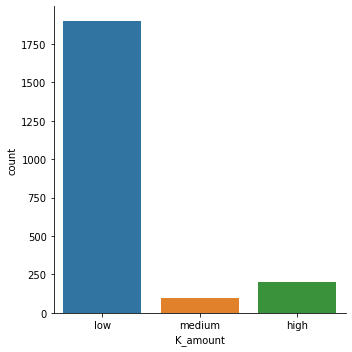

In [7]:
# Visualizing K_amount
sns.catplot(data = df, x = 'K_amount', kind="count")
plt.show()

In [8]:
# Mapping P values to categories (clusters)
criteria = [df['P'].between(0, 100), df['P'].between(100, 200)]
values = ['low','high']

df['P_amount'] = np.select(criteria, values, 0)

df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,K_amount,P_amount
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,low,low
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,low,low
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,low,low
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,low,low
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,low,low


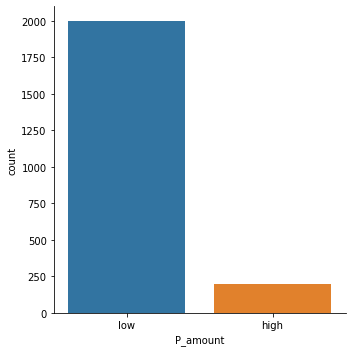

In [9]:
# Visualizing P_amount
sns.catplot(data = df, x = 'P_amount', kind="count")
plt.show()

In [10]:
# Checking the datatypes
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
K_amount        object
P_amount        object
dtype: object

All features are numerical, except the label it's categorical. 

## T-SNE algorithm to visualize the crops in the dataset.

TSNE algorithm (t-distributed Stochastic Neighbor Embedding)  can be used to group the labels of this dataset, which can be seen as an indicator to which crops needs similar growing conditions.

In [11]:
from sklearn.manifold import TSNE
import plotly.express as px

features = df.loc[:, :'rainfall']

tsne = TSNE(n_components = 2, random_state = 0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x = 0, y = 1,
    color = df['label'], labels={'color': 'label'}
)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
tsne = TSNE(n_components = 3, random_state = 0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x = 0, y = 1, z = 2,
    color = df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



The method above showed the crops in 2-d and 3-d plot and help the viewer to understand the distribution of crops in the dataset and what crops are close to each other in terms of growing conditions. 

## Data pre-processing.

In [13]:
# Checking the nulls
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
K_amount       0
P_amount       0
dtype: int64

There are no nulls.

In [14]:
# Checking if the labels are balanced
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

The labels are balanced.

As the data range is logical, there are no nulls and the labels are balanced, the dataset is ready to be fit to the classification models to perform the classification task to predict what crop to grow based on the dataset given features.

## Performing Classification algorithms on the dataset.

### Random Forest Model

In [15]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import train_test_split
random.seed(10)

In [16]:
# Preping the train and test data
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = df['label']  # Label

In [17]:
# Spliting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [18]:
# Creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100) # 100 decision trees

In [19]:
# Training the model using the training sets 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Predicting on testing data
y_pred = clf.predict(X_test)

In [21]:
# Importing scikit-learn modules for performance measuring
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Accuracy is the ratio of correctly predicted samples to the total number of samples. It measures the overall performance of the model.

# Precision is the ratio of correctly predicted positive samples to the total number of positive samples predicted by the model.
# It measures the ability of the model to correctly predict positive samples.

# Recall is the ratio of correctly predicted positive samples to the total number of actual positive samples.
# It measures the ability of the model to find all the positive samples.

# F1-score is the harmonic mean of precision and recall. It is a balanced metric that takes into account both precision and recall.

# ROC-AUC is a plot of the true positive rate against the false positive rate.
# The area under the ROC curve (AUC) is a measure of the overall performance of the model,
# with a value of 1 indicating a perfect classifier and 0.5 indicating a random classifier.

acc1 = metrics.accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred, average='macro')
r1 = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc_1 = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
print(acc1, " ", p1, " ", r1, " ", f1, " ", roc_auc_1)

0.9848484848484849   0.9886017184035477   0.9887445887445888   0.9874495527432606   0.9999825757575757


Because the random forest is a non-deterministic algorihm (even for the same input, can exhibit different behaviors on different runs), it will be run 30 times, and the average metrices will be considered as the model's performance measures.

In [22]:
# Repeating 29 times
for i in range(29):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  acc_t = metrics.accuracy_score(y_test, y_pred)
  p_t = precision_score(y_test, y_pred, average='macro')
  r_t = recall_score(y_test, y_pred, average='macro')
  f_t = f1_score(y_test, y_pred, average='macro')
  roc_auc_t = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
  acc1 = acc1 + acc_t
  p1 = p1 + p_t
  r1 = r1 + r_t
  f1 = f1 + f_t
  roc_auc_1 = roc_auc_1 + roc_auc_t

acc1 = acc1 / 30
p1 = p1 / 30
r1 = r1 / 30
f1 = f1 / 30
roc_auc_1 = roc_auc_1 / 30

print("Accuracy:", acc1)
print("Precision:", p1)
print("Recall:", r1)
print("F1 score:", f1)
print("AUC-ROC curve score:", roc_auc_1)

Accuracy: 0.9934848484848483
Precision: 0.993720622046195
Recall: 0.9937512424124073
F1 score: 0.9935073391752518
AUC-ROC curve score: 0.9999974098124098


As can be seen from the above, the random forest model applied on the crop recommendation dataset resulted in relatively high performnace measures, indicating that the data is preprocessed in a good way and the model selection is appropriate.

### Random forest model with feature selection.

In [23]:
# Variable importance
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
feature_imp = pd.Series(clf.feature_importances_, index = features).sort_values(ascending=False)
feature_imp

rainfall       0.217901
humidity       0.212064
K              0.177420
P              0.146020
N              0.113038
temperature    0.072727
ph             0.060831
dtype: float64

In [24]:
# Using Chi square method to select the 5 relevant features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=5) # Choosing the method
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['N', 'P', 'K', 'humidity', 'rainfall'], dtype='object')

The results of gini index feature importance and feature selection using the above algorithm were the same - eliminating ph and temperature-.

In [25]:
# Preping the train and test data
X = df[['N', 'P', 'K', 'humidity', 'rainfall']]  # Features
y = df['label']  # Label

In [26]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [27]:
# Creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100) # 100 decision trees

In [28]:
# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Predicting on testing data
y_pred = clf.predict(X_test)

In [31]:
# Using scikit-learn modules for performance measuring
acc2 = metrics.accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred, average='macro')
r2 = recall_score(y_test, y_pred, average='macro')
f2 = f1_score(y_test, y_pred, average='macro')
roc_auc_2 = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
print(acc2, " ", p2, " ", r2, " ", f2, " ", roc_auc_2)

0.990909090909091   0.9912028771464091   0.9907101316192225   0.9908433062935312   0.9999975108225108


Because the random forest is a non-deterministic algorihm (even for the same input, can exhibit different behaviors on different runs), it will be run 30 times, and the average measures will be considered as the model's performance measures.

In [32]:
# Repeating 29 times
for i in range(29):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  acc_t = metrics.accuracy_score(y_test, y_pred)
  p_t = precision_score(y_test, y_pred, average='macro')
  r_t = recall_score(y_test, y_pred, average='macro')
  f_t = f1_score(y_test, y_pred, average='macro')
  roc_auc_t = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
  acc2 = acc2 + acc_t
  p2 = p2 + p_t
  r2 = r2 + r_t
  f2 = f2 + f_t
  roc_auc_2 = roc_auc_2 + roc_auc_t

acc2 = acc2 / 30
p2 = p2 / 30
r2 = r2 / 30
f2 = f2 / 30
roc_auc_2 = roc_auc_2 / 30

print("Accuracy:", acc2)
print("Precision:", p2)
print("Recall:", r2)
print("F1 score:", f2)
print("AUC-ROC curve score:", roc_auc_2)

Accuracy: 0.9915656565656564
Precision: 0.9914366554860723
Recall: 0.9917491269369996
F1 score: 0.9914165523339757
AUC-ROC curve score: 0.9999943722943724


As noted from the above, when removing the PH and temprature features, the performances of classification drops a little, which implies that these two features are important but can be ignored if not available.

### Neural network model.

In [33]:
# Separating the label from other features 
df = df.drop('K_amount', axis = 1)
df = df.drop('P_amount', axis = 1) 
X = df.drop('label', axis = 1)

In [34]:
# Converting the crop label to numerical
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df['label'] = label_encode.fit_transform(df['label'])
y = df['label']

In [35]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [38]:
# Using scikit-learn to grid search the batch size and epochs

# Function to create model, required for KerasClassifier
def create_model():
 # creating model
 model = Sequential()
 model.add(Dense(64, input_shape=(7,), activation='relu'))
 model.add(Dense(64, activation='relu'))
 model.add(Dense(64, activation='relu'))
 model.add(Dense(22, activation='softmax'))
 # Compiling model
 model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
 return model

In [39]:
# Creating model
model = KerasClassifier(model = create_model, verbose=0)

# Defining the grid search parameters
batch_size = [32, 64, 128]
epochs = [200, 400, 600, 800]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, y)

# Summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.971366 using {'batch_size': 32, 'epochs': 400}


In [40]:
batch_size = grid_result.best_params_['batch_size']
epochs = grid_result.best_params_['epochs']

Now, the parameters that produce the best neural network accuracy will be used to build the actual model.

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(22, activation='softmax'))

# Compiling model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size = batch_size, epochs = epochs)

Epoch 1/400
34/34 [==============================] - 1s 7ms/step - loss: 6.7250 - accuracy: 0.2458 - val_loss: 1.6274 - val_accuracy: 0.5022
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.7199 - val_loss: 0.7114 - val_accuracy: 0.7706
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.8423 - val_loss: 0.4687 - val_accuracy: 0.8745
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8887 - val_loss: 0.3813 - val_accuracy: 0.8723
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9239 - val_loss: 0.3062 - val_accuracy: 0.9026
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.9249 - val_loss: 0.2622 - val_accuracy: 0.9199
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9230 - val_loss: 0.3279 - val_accuracy: 0.8918
Epoch 8/400
3

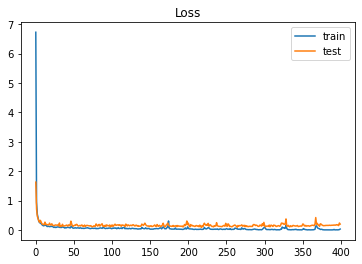

In [44]:
from matplotlib import pyplot
# Plotting loss during training
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

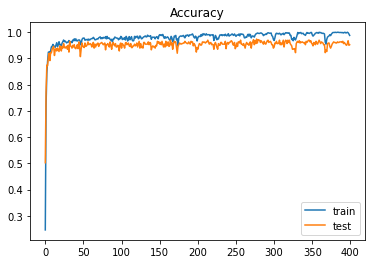

In [45]:
# Plotting accuracy during training
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [46]:
# Making predictions
predict_x = model.predict(X_test) 
y_pred = np.argmax(predict_x, axis=1)

21/21 [==============================] - 0s 940us/step


In [47]:
# Using scikit-learn modules for performance measuring
acc3 = metrics.accuracy_score(y_test, y_pred)
p3 = precision_score(y_test, y_pred, average='macro')
r3 = recall_score(y_test, y_pred, average='macro')
f3 = f1_score(y_test, y_pred, average='macro')
roc_auc_3 = roc_auc_score(y_test, predict_x, multi_class='ovr')
print("Accuracy:", acc3)
print("Precision:", p3)
print("Recall:", r3)
print("F1 score:", f3)
print("AUC-ROC curve score:", roc_auc_3)

Accuracy: 0.9651515151515152
Precision: 0.9638653802929646
Recall: 0.9631944506581313
F1 score: 0.9634320953626115
AUC-ROC curve score: 0.9991803503384229


The neural network model classified the crops in the dataset with a performance lower than the random forest models above.

# Evaluation of the different clustering techniques

In [48]:
clustering_performance = {'Clustering Procedure': ['Random Forest', 'Random Forest with feature selection', 'Neural network'],
                          'Accuracy': [acc1, acc2, acc3],
                          'Precision': [p1, p2, p3],
                          'Recall': [r1, r2, r3],
                          'F1 Score': [f1, f2, f3],
                          'AUC-ROC curve score': [roc_auc_1, roc_auc_2, roc_auc_3]}

clustering_performance = pd.DataFrame.from_dict(clustering_performance)
clustering_performance

,Clustering Procedure,Accuracy,Precision,Recall,F1 Score,AUC-ROC curve score
0,Random Forest,0.993485,0.993721,0.993751,0.993507,0.999997
1,Random Forest with feature selection,0.991566,0.991437,0.991749,0.991417,0.999994
2,Neural network,0.965152,0.963865,0.963194,0.963432,0.999180


The above demonstrates the difference in performance for the classification algorithms applied in this notebook above.

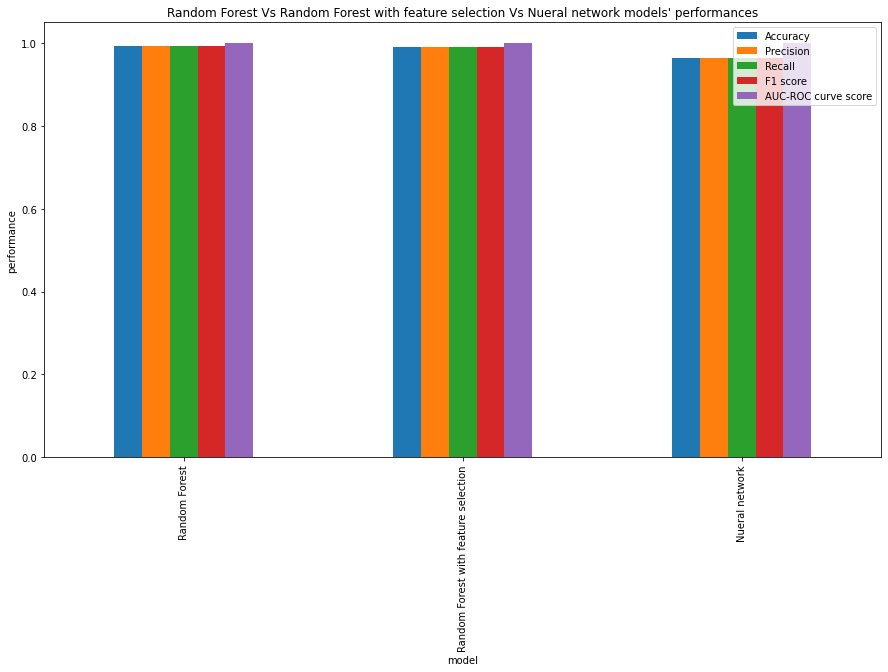

In [49]:
# Plotting the result of my experiment
import pandas as pd

plotdata = pd.DataFrame({

    "Accuracy":[acc1, acc2, acc3],

    "Precision":[p1, p2, p3],

    "Recall":[r1, r2, r3],

    "F1 score": [f1, f2, f3],
    
    "AUC-ROC curve score": [roc_auc_1, roc_auc_2, roc_auc_3]},

    index = ["Random Forest", "Random Forest with feature selection", "Nueral network"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Random Forest Vs Random Forest with feature selection Vs Nueral network models' performances")

plt.xlabel("model")

plt.ylabel("performance")

plt.show()

# References


1- https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset

2- https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

3- https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics